In [1]:
#self_confining.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'confine_inner_edge = ', confine_inner_edge
print 'confine_outer_edge = ', confine_outer_edge
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'execution time (min) = ', (monitor['current_time'] - monitor['start_time'])/60.0
print 'monitor = ', monitor

r.shape =  (1001, 2, 241)
total_ring_mass =  1e-10
shear_viscosity =  1e-13
bulk_viscosity =  1e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.01, 'e_prime': 0.0}
confine_inner_edge =  False
confine_outer_edge =  False
e.min() =  0.009982936743362768
e.max() =  0.010017094252195706
execution time (min) =  46.6833333333
monitor =  {'current_time': 1703471192, 'streamline_crossing_timestep': None, 'start_time': 1703468391, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 1700000, 'self_interacting': True}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
print 'viscous_timescale (orbits) = ', viscous_timescale/(2*np.pi)
times_viscous = times/viscous_timescale
print 'times_viscous.max() = ', times_viscous.max()
print ('number of orbits evolves (10^5) = ', times.max()/(2*np.pi)/1.0e5)

viscous_timescale =  8333.333333333332
viscous_timescale (orbits) =  1326.291192432461
times_viscous.max() =  102.00000000000001
('number of orbits evolves (10^5) = ', 1.3528170162811104)


In [4]:
#ring stats in physical units
G_cgs = 6.67e-8
M_planet_gm = 5.68e29
r0_cm = 1.0e10
total_ring_mass_gm = total_ring_mass*M_planet_gm
print 'total_ring_mass_gm = ', total_ring_mass_gm
satellite_density_cgs = 1.0                       #density if ringlet was instead a satellite
satellite_radius_cm = (3*total_ring_mass_gm/(4*np.pi*satellite_density_cgs))**(1.0/3.0)
print 'satellite_radius_cm = ', satellite_radius_cm
print 'satellite_radius    (km) = ', satellite_radius_cm/1.0e5
radial_width_cm = radial_width*r0_cm
print 'radial_width_cm = ', radial_width_cm
print 'ringlet radial_width    (km) = ', radial_width_cm/1.0e5
orbit_period_sec = 2*np.pi*np.sqrt(r0_cm*r0_cm*r0_cm/(G_cgs*M_planet_gm))
print 'orbit_period_sec = ', orbit_period_sec
print 'orbit_period    (hours) = ', orbit_period_sec/3600
viscous_timescale_sec = (viscous_timescale/(2*np.pi))*orbit_period_sec
print 'viscous_timescale_sec = ', viscous_timescale_sec
print 'viscous_timescale    (years) = ', viscous_timescale_sec/(60*60*24*365.25)
shear_viscosity_cgs = radial_width_cm*radial_width_cm/(12*viscous_timescale_sec)
print 'shear_viscosity_cgs = ', shear_viscosity_cgs
surface_density_cgs = total_ring_mass_gm/(2*np.pi*r0_cm*radial_width_cm)
print 'surface_density_cgs = ', surface_density_cgs

total_ring_mass_gm =  5.68e+19
satellite_radius_cm =  2384623.9902
satellite_radius    (km) =  23.846239902
radial_width_cm =  1000000.0
ringlet radial_width    (km) =  10.0
orbit_period_sec =  32280.688093248707
orbit_period    (hours) =  8.966857803680197
viscous_timescale_sec =  42813592.303735174
viscous_timescale    (years) =  1.3566808725547943
shear_viscosity_cgs =  1946.4223590988674
surface_density_cgs =  904.000076762


In [5]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [6]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
    orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)

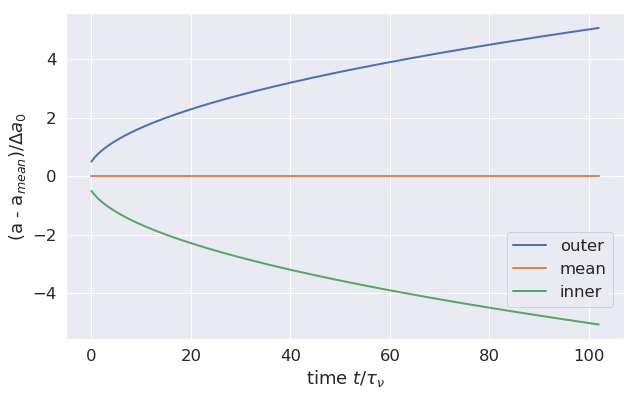

In [7]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend(loc=(0.79, 0.1))
#p = ax.set_ylim(-3, 3)

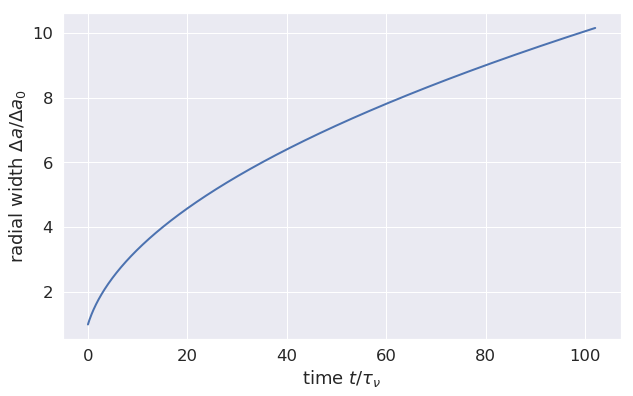

In [8]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
#p = ax.set_ylim(1, 6)

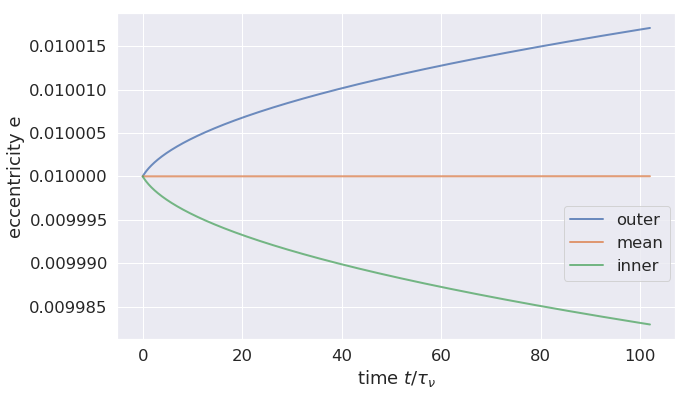

In [9]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc=(0.8, 0.18))

In [10]:
#compute system total angular momentum
r_bc, t_bc, vr_bc, vt_bc, r_0, t_0, vr_0, vt_0 = planeto2bary_all_times(times, r, t, vr, vt, total_ring_mass)
planet_angular_momentum, inner_ring_angular_momentum, outer_ring_angular_momentum, total_angular_momentum = \
    system_angular_momentum(times, r_bc, t_bc, vr_bc, vt_bc, r_0, t_0, vr_0, vt_0, \
        total_ring_mass, number_of_streamlines, particles_per_streamline)
delta_angular_momentum = total_angular_momentum - total_angular_momentum[0]
fractional_angular_momentum_change = np.abs(delta_angular_momentum/total_angular_momentum[0])
print ('planet_angular_momentum[0] = ', planet_angular_momentum[0])
print ('total_angular_momentum[0] = ', total_angular_momentum[0])
print 'max fractional angular momentum change = ', fractional_angular_momentum_change.max()

('planet_angular_momentum[0] = ', 1.125210229715463e-34)
('total_angular_momentum[0] = ', 1.0000249993750388e-10)
max fractional angular momentum change =  1.2720327365667477e-07


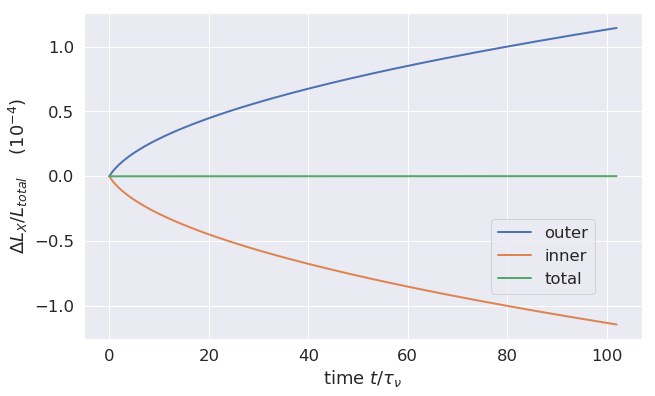

In [11]:
#plot delta_X_angular_momentum over time, for X=inner/outer streamline
factor = (1.0e-4)*total_angular_momentum[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (outer_ring_angular_momentum - outer_ring_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='outer')
y = (inner_ring_angular_momentum - inner_ring_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='inner')
y = (total_angular_momentum - total_angular_momentum[0])/factor
p = ax.plot(x, y, linestyle='-', linewidth=2, label='total')
p = ax.set_ylabel(r'$\Delta L_X/L_{total}$    $(10^{-4})$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc=(0.73, 0.14))

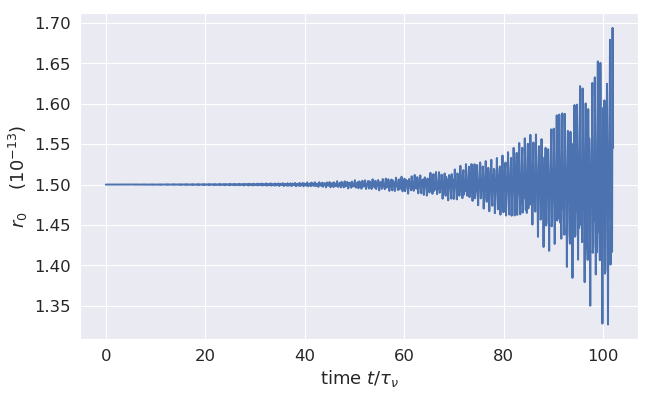

In [12]:
#central planet's distance from barycenter
factor = 1.0e-12
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = r_0/factor
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'$r_0$    $(10^{-13})$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

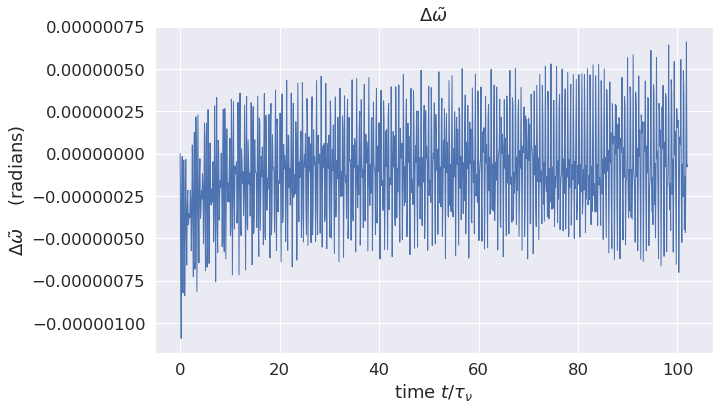

In [13]:
#plot dwt versus time
x = times_viscous
y = dwt
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

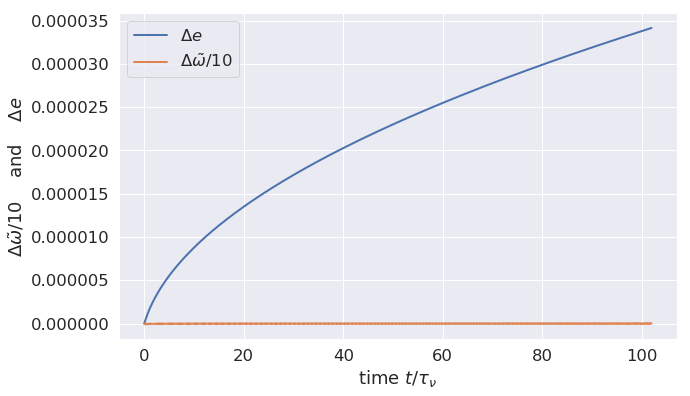

In [14]:
#plot de and dwt aversus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = dwt/10
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}/10$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}/10$    and    $\Delta e$')
p = ax.legend()

In [15]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H.mean()

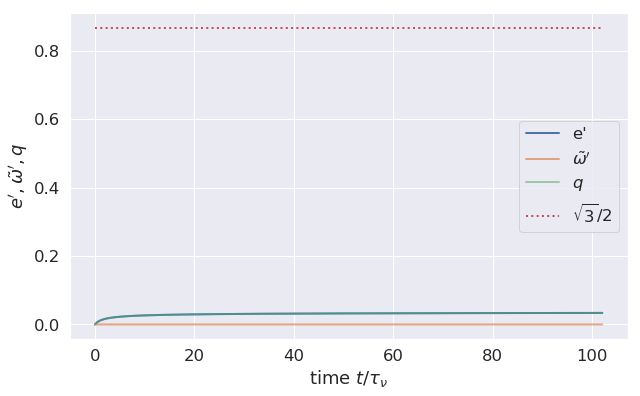

In [16]:
#plot e_prime wt_prime and q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.7, label=r"$\tilde{\omega}'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e', \tilde{\omega}', q$")
p = ax.legend()

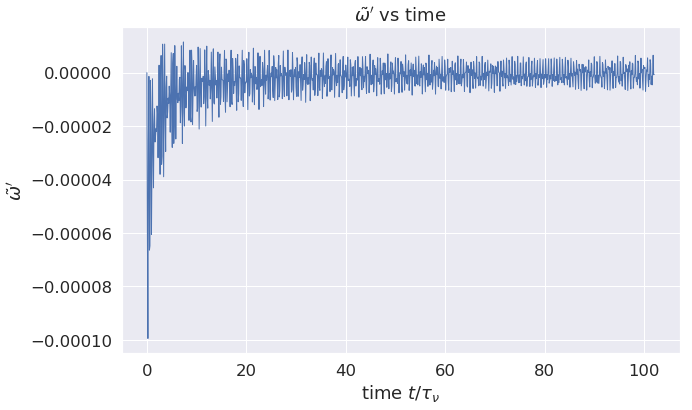

In [17]:
#plot wt_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$\tilde{\omega}'$")
p = ax.set_title(r"$\tilde{\omega}'$ vs time")